# Exercise 4

**Match searches with bookings**

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match.
- For the bookings file, origin and destination are the columns `dep_port` and `arr_port`, respectively.
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

### Modules and libraries

In [197]:
import numpy as np
import pandas as pd

### Work path

1. Get familiar with data
2. Prepare the data for processing
3. Make action plan
4. Develop the code that works with a sample
5. Adjust the code to work with Big data
6. Test big data approach on a sample
7. Run program with big data

In [198]:
# Where is the data

folder_path = "C:/Users/Pablo Villar/Desktop/CURSOS/KSchool/Máster en Data Science/8. Data Science Challenge/"
bookings_file = "bookings.csv.bz2"
searches_file = "searches.csv.bz2"

In [199]:
# Function to read a sample of the file

def read_sample_file(path: str):
    df = pd.read_csv(path,
                nrows=1e6,          # for sample data
                sep='^',
                compression='bz2')
    return df

In [200]:
read_sample_file(folder_path+bookings_file)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2013-05-18 00:00:00,1A,LK,1a5585bef21f0bf8dc865a87843635f9,6ff8fd087f94799d7aed903683384775,3b339797f7eca14c24e8b7565da822c0,2013-05-14 00:00:00,13203,0,CMB,...,MAACMB,FV,V,Y,2013-05-24 16:05:00,2013-05-24 17:38:39,-1,2013,5,NULL
999996,2013-05-18 00:00:00,1A,LK,1a5585bef21f0bf8dc865a87843635f9,6ff8fd087f94799d7aed903683384775,3b339797f7eca14c24e8b7565da822c0,2013-05-14 00:00:00,6003,0,CMB,...,MAACMB,FV,V,Y,2013-05-19 16:05:00,2013-05-19 17:38:39,1,2013,5,NULL
999997,2013-05-28 00:00:00,1A,US,07e98d2fd3cd4b737266b99727f7faa8,e8741eaf2fa2f71f931475d18fa72096,2b22597bdad931843c3b1d5219836e07,2013-05-28 00:00:00,328,1865,AUS,...,AUSDFWRDU,KK,Q,Y,2013-07-12 08:35:00,2013-07-12 15:03:14,1,2013,5,SEAEX38AA
999998,2013-05-28 00:00:00,1A,FR,e2679367673d50f1ee085127d8a00eba,5f26f53ca29672815e0ee3bd93a2b0e4,4eb40315a7263131ae17712cd505b62a,2013-05-28 00:00:00,588,0,TLS,...,TLSORY,KP,S,Y,2013-06-04 10:50:00,2013-06-04 12:18:20,1,2013,5,LYSSR210Z


Making sample variables for the files

In [201]:
bookings_sample = read_sample_file(folder_path+bookings_file)

In [202]:
searches_sample = read_sample_file(folder_path+searches_file)

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_19188\2203982266.py:4: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,


<hr>

## 1. Get familiar with data

**Basic Data Exploration** 

In [203]:
bookings_sample.shape

(1000000, 38)

In [204]:
searches_sample.shape

(1000000, 45)

In [205]:
bookings_sample.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [206]:
bookings_sample.columns.tolist()

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [207]:
searches_sample.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [208]:
bookings_sample.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [209]:
searches_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [210]:
bookings_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 38 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   act_date             1000000 non-null  object
 1   source               1000000 non-null  object
 2   pos_ctry             1000000 non-null  object
 3   pos_iata             1000000 non-null  object
 4   pos_oid              1000000 non-null  object
 5   rloc                 1000000 non-null  object
 6   cre_date             1000000 non-null  object
 7   duration             1000000 non-null  int64 
 8   distance             1000000 non-null  int64 
 9   dep_port             1000000 non-null  object
 10  dep_city             1000000 non-null  object
 11  dep_ctry             1000000 non-null  object
 12  arr_port             1000000 non-null  object
 13  arr_city             1000000 non-null  object
 14  arr_ctry             1000000 non-null  object
 15  lst_port        

In [211]:
searches_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 45 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Date               1000000 non-null  object
 1   Time               1000000 non-null  object
 2   TxnCode            1000000 non-null  object
 3   OfficeID           1000000 non-null  object
 4   Country            999878 non-null   object
 5   Origin             1000000 non-null  object
 6   Destination        1000000 non-null  object
 7   RoundTrip          1000000 non-null  int64 
 8   NbSegments         1000000 non-null  int64 
 9   Seg1Departure      1000000 non-null  object
 10  Seg1Arrival        1000000 non-null  object
 11  Seg1Date           997115 non-null   object
 12  Seg1Carrier        375381 non-null   object
 13  Seg1BookingCode    102150 non-null   object
 14  Seg2Departure      709149 non-null   object
 15  Seg2Arrival        709149 non-null   object
 16  S

### Columns that we need from bookings file to match with searches:

|searches [index]|bookings [index]|
|:---:|:---:|
|Origin [5]|dep_port [9]|
|Destination [6]|arr_port [12]|
|Date [0]|cre_date [6]|
|Seg1Date [11]|brd_time [32]|

I take `cre_date` column because it's the creation date of the booking

Always it's better to know more about the data columns to do a good exploration 

<hr>

## 2. Prepare the data for processing

1. Select in the data the columns of interest
2. Delete spaces in values and columns `strip`
3. Date/time to date (Year-Month-Year) slicing method `str[:10]`
4. Drop duplicates
5. Search for Na values and if it's possible investigate the rows and drop them

### 1. Select in the data the columns of interest

In [212]:
# Bookings
# Select the columns by index, you can check the data with df.info and see the index columns

interest_columns_bookings = [6,9,12,32]

bookings_sample_interest = bookings_sample.iloc[:,interest_columns_bookings]
bookings_sample_interest.head()

,cre_date,dep_port,arr_port,brd_time
0,2013-02-22 00:00:00,ZRH,LHR,2013-03-07 08:50:00
1,2013-03-26 00:00:00,SAL,CLT,2013-04-12 13:04:00
2,2013-03-26 00:00:00,SAL,CLT,2013-07-15 07:00:00
3,2013-03-26 00:00:00,AKL,SVO,2013-04-24 23:59:00
4,2013-03-26 00:00:00,AKL,SVO,2013-05-14 20:15:00


In [213]:
# Searches

interest_columns_searches = [0, 5, 6, 11]

searches_sample_interest = searches_sample.iloc[:,interest_columns_searches]
searches_sample_interest.columns.tolist()

['Date', 'Origin', 'Destination', 'Seg1Date']

### 2. Delete spaces in values and columns `strip`

In [214]:
# Columns Bookings

bookings_sample_interest.columns = bookings_sample_interest.columns.str.strip()
bookings_sample_interest.columns.tolist()

['cre_date', 'dep_port', 'arr_port', 'brd_time']

In [215]:
# Checking the number of unique dep_ports in the sample
# This step it's only for curiosity

len(bookings_sample_interest['dep_port'].unique())

2146

In [216]:
# Checking the size of the values in dep_port should got 3 for the iata_codes

[i for i in bookings_sample_interest['dep_port'] if len(i)<=3]

[]

This returns a empty list so the values have more than 3 characters and that's wrong. We need to clear that blank spaces

In [217]:
bookings_sample_interest['dep_port'][0]

'ZRH     '

In [218]:
# IATA_CODES for names of airports
# Delete the blankspaces in data and put in upper the str

bookings_sample_interest["dep_port"] = bookings_sample_interest["dep_port"].str.strip().str.upper()
bookings_sample_interest["arr_port"] = bookings_sample_interest["arr_port"].str.strip().str.upper()

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_19188\3378823363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_sample_interest["dep_port"] = bookings_sample_interest["dep_port"].str.strip().str.upper()
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_19188\3378823363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_sample_interest["arr_port"] = bookings_sample_interest["arr_port"].str.strip().str.upper()


In [219]:
# Now if we say diferent len 3 it returns us all the values
# If the data values are correct should return nothing

for i in bookings_sample_interest['dep_port']:
    if len(i)==3:
        pass
    else:
        print("The iata_code gots different lenght")
        

In [220]:
[i for i in searches_sample_interest['Destination'] if len(i)<3]

[]

In [221]:
[i for i in searches_sample_interest['Destination'] if len(i)>3]

[]

Searches values seems correct

### 3. Date/time to date (Year-Month-Year) slicing method `str[:10]`

`cre_date` don't have the correct format so we will take the date slicing it

Slicing the dates to year-month-day

In [222]:
bookings_sample_interest.columns

Index(['cre_date', 'dep_port', 'arr_port', 'brd_time'], dtype='object')

In [223]:
# Bookings

bookings_sample_interest['cre_date'] = bookings_sample_interest['cre_date'].str[:10]
bookings_sample_interest['brd_time'] = bookings_sample_interest['brd_time'].str[:10]
bookings_sample_interest[['cre_date','brd_time']]

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_19188\659443895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_sample_interest['cre_date'] = bookings_sample_interest['cre_date'].str[:10]
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_19188\659443895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_sample_interest['brd_time'] = bookings_sample_interest['brd_time'].str[:10]


,cre_date,brd_time
0,2013-02-22,2013-03-07
1,2013-03-26,2013-04-12
2,2013-03-26,2013-07-15
3,2013-03-26,2013-04-24
4,2013-03-26,2013-05-14
...,...,...
999995,2013-05-14,2013-05-24
999996,2013-05-14,2013-05-19
999997,2013-05-28,2013-07-12
999998,2013-05-28,2013-06-04


Searches dates have the correct format

In [224]:
len(searches_sample_interest['Date'][0])

10

**NOTE**

We could do the same but with pandas

We can convert the column `cre_date` and `brd_time` to pandas datetime.

In [225]:
# convert to datetime

bookings_sample_interest['cre_date'] = pd.to_datetime(bookings_sample_interest['cre_date'])
bookings_sample_interest.dtypes

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_19188\1221026220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_sample_interest['cre_date'] = pd.to_datetime(bookings_sample_interest['cre_date'])


cre_date    datetime64[ns]
dep_port            object
arr_port            object
brd_time            object
dtype: object

In [226]:
# remove time from Date and it returns us an object type like before

bookings_sample_interest['cre_date'] = bookings_sample_interest['cre_date'].dt.date

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_19188\4087434882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_sample_interest['cre_date'] = bookings_sample_interest['cre_date'].dt.date


In [227]:
bookings_sample_interest.dtypes

cre_date    object
dep_port    object
arr_port    object
brd_time    object
dtype: object

In [228]:
bookings_sample_interest.head()

,cre_date,dep_port,arr_port,brd_time
0,2013-02-22,ZRH,LHR,2013-03-07
1,2013-03-26,SAL,CLT,2013-04-12
2,2013-03-26,SAL,CLT,2013-07-15
3,2013-03-26,AKL,SVO,2013-04-24
4,2013-03-26,AKL,SVO,2013-05-14


### 4. Drop duplicates

In [229]:
# Searching and sum the duplicates of bookings sample

bookings_sample_interest.duplicated().sum()

341002

In [230]:
# Create a new variable that store the sample without duplicates

bookings_sample_interest_no_dups = bookings_sample_interest.drop_duplicates()

In [231]:
print(bookings_sample_interest_no_dups.shape)
print(bookings_sample_interest.shape)

(658998, 4)
(1000000, 4)


In [232]:
# Searching and sum the duplicates of searches sample

searches_sample_interest.duplicated().sum()

641668

In [233]:
# Create a new variable that store the sample without duplicates

searches_sample_interest_no_dups = searches_sample_interest.drop_duplicates()
searches_sample_interest_no_dups.shape

(358332, 4)

In [234]:
print(searches_sample_interest_no_dups.shape)
print(searches_sample_interest.shape)

(358332, 4)
(1000000, 4)


### 5. Search for Na values and if it's possible investigate the rows and drop them

In [235]:
# searching for na values

bookings_sample_interest_no_dups.isna().sum()

cre_date    0
dep_port    0
arr_port    0
brd_time    0
dtype: int64

In [236]:
searches_sample_interest_no_dups.isna().sum()

Date              0
Origin            0
Destination       0
Seg1Date       1024
dtype: int64

In [237]:
searches_sample_interest_no_dups.isnull().any()

Date           False
Origin         False
Destination    False
Seg1Date        True
dtype: bool

In [238]:
# Para encontrar los valores nulos de nuestro Dataframe

# Creamos variable para ver si hay valores nulos en las columnas
null_columns  = searches_sample_interest_no_dups.columns[searches_sample_interest_no_dups.isnull().any()] 

# Observamos los valores nulos de las columnas
searches_sample_interest_no_dups[null_columns].isnull().sum()

# Devuelve el df con los valores nulos
print(searches_sample_interest_no_dups[searches_sample_interest_no_dups.isnull().any(axis=1)][null_columns])    

       Seg1Date
154         NaN
271         NaN
462         NaN
709         NaN
1017        NaN
...         ...
356961      NaN
357081      NaN
357279      NaN
357375      NaN
357755      NaN

[1024 rows x 1 columns]


In [239]:
# Create a new variable that store the sample without na values

searches_sample_interes_no_dups_na = searches_sample_interest_no_dups.dropna()

In [240]:
searches_sample_interest_no_dups[null_columns].isnull().sum()

Seg1Date    1024
dtype: int64

Now let's try to do a merge with a new column in Bookings that we name it "Booked"

This column will tell us 1 if it's a searched with a booked and 0 it's a search not booked

In [241]:
bookings_sample_interest_no_dups['Booked'] = 1

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_19188\3839629486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_sample_interest_no_dups['Booked'] = 1


In [242]:
bookings_sample_interest_no_dups.columns

Index(['cre_date', 'dep_port', 'arr_port', 'brd_time', 'Booked'], dtype='object')

In [243]:
bookings_sample_interest_no_dups.head()

,cre_date,dep_port,arr_port,brd_time,Booked
0,2013-02-22,ZRH,LHR,2013-03-07,1
1,2013-03-26,SAL,CLT,2013-04-12,1
2,2013-03-26,SAL,CLT,2013-07-15,1
3,2013-03-26,AKL,SVO,2013-04-24,1
4,2013-03-26,AKL,SVO,2013-05-14,1


In [244]:
searches_bookings_sample = searches_sample_interes_no_dups_na.merge(
    bookings_sample_interest_no_dups,
    how="left",
    left_on= ['Date','Origin','Destination'],
    right_on= ['cre_date','dep_port','arr_port'])

searches_bookings_sample

,Date,Origin,Destination,Seg1Date,cre_date,dep_port,arr_port,brd_time,Booked
0,2013-01-01,TXL,AUH,2013-01-26,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,ICT,SFO,2013-08-02,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,RNB,ARN,2013-01-02,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,OSL,MAD,2013-03-22,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
357303,2013-12-25,AMD,DEL,2014-01-07,NaN,NaN,NaN,NaN,NaN
357304,2013-12-25,DUS,VIE,2013-12-30,NaN,NaN,NaN,NaN,NaN
357305,2013-12-25,YVR,YYZ,2014-01-06,NaN,NaN,NaN,NaN,NaN
357306,2013-12-25,DME,BKK,2013-12-28,NaN,NaN,NaN,NaN,NaN


In [245]:
# Observamos que booked ahora tiene valores de Na y 1
# 1 serán las searches que han sido bookings

searches_bookings_sample['Booked'].unique()

array([nan])

Rellenamos los Na de la columna Booked con valores = 0

Y de paso los convertimos a enteros

In [246]:
searches_bookings_sample['Booked'] = searches_bookings_sample['Booked'].fillna(0)           # Fill Na values with 0
searches_bookings_sample['Booked'] = searches_bookings_sample['Booked'].astype(int)         # Change the type from float to int
searches_bookings_sample['Booked'].unique()

array([0])

In [247]:
searches_bookings_sample.head()

,Date,Origin,Destination,Seg1Date,cre_date,dep_port,arr_port,brd_time,Booked
0,2013-01-01,TXL,AUH,2013-01-26,NaN,NaN,NaN,NaN,0
1,2013-01-01,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,0
2,2013-01-01,ICT,SFO,2013-08-02,NaN,NaN,NaN,NaN,0
3,2013-01-01,RNB,ARN,2013-01-02,NaN,NaN,NaN,NaN,0
4,2013-01-01,OSL,MAD,2013-03-22,NaN,NaN,NaN,NaN,0


In [289]:
s_b = searches_bookings_sample[searches_bookings_sample['Booked']==1]

In [288]:
s_b

,Date,Origin,Destination,Seg1Date,cre_date,dep_port,arr_port,brd_time,Booked


Observamos que a primera vista coinciden Origen, Destino y Date de Searches con dep_port, arr_port y cre_date

No nos coincide la columna de Seg1Date con brd_time

Probablemente Seg1Date no sea la misma fecha de salida del vuelo que la del brd_time porque haya buscado ese vuelo pero haya reservado para otras fechas

In [287]:
s_b.describe()

,Booked
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [286]:
searches_bookings_sample[searches_bookings_sample['Booked'] == 1]

,Date,Origin,Destination,Seg1Date,cre_date,dep_port,arr_port,brd_time,Booked


In [252]:
searches_bookings_sample[searches_bookings_sample['Booked'] == 0]

,Date,Origin,Destination,Seg1Date,cre_date,dep_port,arr_port,brd_time,Booked
0,2013-01-01,TXL,AUH,2013-01-26,NaN,NaN,NaN,NaN,0
1,2013-01-01,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,0
2,2013-01-01,ICT,SFO,2013-08-02,NaN,NaN,NaN,NaN,0
3,2013-01-01,RNB,ARN,2013-01-02,NaN,NaN,NaN,NaN,0
4,2013-01-01,OSL,MAD,2013-03-22,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
357303,2013-12-25,AMD,DEL,2014-01-07,NaN,NaN,NaN,NaN,0
357304,2013-12-25,DUS,VIE,2013-12-30,NaN,NaN,NaN,NaN,0
357305,2013-12-25,YVR,YYZ,2014-01-06,NaN,NaN,NaN,NaN,0
357306,2013-12-25,DME,BKK,2013-12-28,NaN,NaN,NaN,NaN,0


In [253]:
searches_bookings_sample.shape

(357308, 9)

In [254]:
# In the sample we have this searches with bookings and searches without bookings

search_with_booking = 28046
search_without_booking = 344691

print(f'''We can see in this data sample {(lambda search_with_booking,search_without_booking:
      (str((search_with_booking/(search_without_booking+search_with_booking))*100))[:4])
      (search_with_booking,search_without_booking)} % represents searches that ends in bookings''')

We can see in this data sample 7.52 % represents searches that ends in bookings


╰(*°▽°*)╯
<hr>

## 3. Make action plan

* First we will make a data preprocessing function. One for **bookings** and another for **searches**.
* Then store this data clean (without duplicates, Na values, without blank spaces...) in csv with chunks to make a smaller data files.
* To count the bookings we have to create a new column `['Booking']` in the chunks of bookings before stored in the a new file, with `int` values (0,1) 1 for searches that end with bookings and 0 only for searches.
  > The 0 values will be filled when we do the merge
* We will merge (Left join) the datafiles without duplicates with the columns selected before:
  ````bash
  * Searches ['Date','Origin','Destination','Seg1Date']
  * Bookings ['cre_date ','dep_port','arr_port','brd_time']
  ````
* Finally make a function who works for all the code

<hr>

## 4. Develop the code that works with a sample

In [255]:
# Paths form the entire files

path_searches = "C:/Users/Pablo Villar/Desktop/CURSOS/KSchool/Máster en Data Science/8. Data Science Challenge/searches.csv.bz2"
path_bookings = "C:/Users/Pablo Villar/Desktop/CURSOS/KSchool/Máster en Data Science/8. Data Science Challenge/bookings.csv.bz2"

# Paths with the clean data

path_searches_no_dup = "C:/Users/Pablo Villar/Desktop/GitHub/DS_Challenge/ds_exercises/searches_no_dups.csv"
path_bookings_no_dup = "C:/Users/Pablo Villar/Desktop/GitHub/DS_Challenge/ds_exercises/bookings_no_dups.csv"

Reading the data with chunks

**SEARCHES**
<hr>

In [256]:
%%time

interest_columns_searches = [0, 5, 6, 11]

data_iterator = pd.read_csv(path_searches, 
                            chunksize=2e6,
                            # nrows=2e6,              # To run the function with sample data
                            sep='^', 
                            compression='bz2', 
                            low_memory=False,         # set low_memory = False means when the file is larger, read_csv loads the file in chunks. If an entire chunk has all numeric values, read_csv will save it as numeric. If it encounters some non-numeric values in a chunk, then it will save the values in that chunk as non-numeric (object).
                            usecols=interest_columns_searches,
                            dtype=str)

# Create a dataframe where we go to append the chunks
searches = pd.DataFrame()

for i, data_chunk in enumerate(data_iterator):
    searches = searches.append(data_chunk)
    searches.drop_duplicates(inplace=True)                              # Drop duplicates cost a lot of time
    searches.to_csv(path_searches_no_dup, sep='^', index=False)         # Save the data in a new csv
    print('Chunk: %d, size of chunk %d' %(i+1, searches.shape[0]))
    print("="*66)       # Separator

<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 1, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 2, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 3, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 4, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 5, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 6, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 7, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 8, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 9, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 10, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 11, size of chunk 358334
CPU times: total: 33.8 s
Wall time: 1min 37s


**BOOKINGS**
<hr>

In [257]:
%%time

interest_columns_bookings = [6,9,12,32]             # Taking the index of the columns and don't clean the blank spaces

data_iterator = pd.read_csv(path_bookings,
                            chunksize = 2e6,
                            sep = '^',
                            compression = 'bz2',
                            # nrows = 2e6,
                            usecols = interest_columns_bookings,
                            low_memory=True, 
                            dtype=str)

bookings = pd.DataFrame()

for i, data_chunk in enumerate(data_iterator):
    #data_chunk = bookings_data_preprocessing(data_chunk)
    #data_chunk.reset_index(inplace=True)
    data_chunk['Booked'] = 1               # Create the column of values for bookings
    bookings = bookings.append(data_chunk)
    bookings.drop_duplicates(inplace=True)
    print("Chunk: %d, size of chunk %d" %(i+1, bookings.shape[0]))
    print("="*66)

<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 1, size of chunk 708879


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 2, size of chunk 708879


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 3, size of chunk 708882


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 4, size of chunk 708882


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 5, size of chunk 708882


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 6, size of chunk 708882
CPU times: total: 19.3 s
Wall time: 1min 31s


At this moment we have the new data stored by chunks without duplicates.

Read the smaller data with no duplicates cleaning it while reading and `merge` **Searches** with **Bookings**

Limpiamos el len de los códigos de aeropuertos para **Bookings**

In [258]:
bookings['dep_port'] = bookings['dep_port'].str.strip().str.upper()
bookings['arr_port'] = bookings['arr_port'].str.strip().str.upper()

In [259]:
wrong_len_b_arr = bookings["arr_port"].str.len() < 3
wrong_len_b_arr.sort_values(ascending=False)

5000007     True
0          False
666630     False
666622     False
666623     False
           ...  
334139     False
334140     False
334141     False
334142     False
5000008    False
Name: arr_port, Length: 708882, dtype: bool

In [260]:
wrong_len_b_dep = bookings["dep_port"].str.len() < 3
wrong_len_b_dep.sort_values(ascending=False)

5000007     True
0          False
666630     False
666622     False
666623     False
           ...  
334139     False
334140     False
334141     False
334142     False
5000008    False
Name: dep_port, Length: 708882, dtype: bool

In [261]:
# Drop the Na values with the index

bookings = bookings.drop([5000007])

In [262]:
wrong_len_b_arr = bookings["arr_port"].str.len() < 3
wrong_len_b_arr.sort_values(ascending=False)

0          False
666630     False
666622     False
666623     False
666624     False
           ...  
334139     False
334140     False
334141     False
334142     False
5000008    False
Name: arr_port, Length: 708881, dtype: bool

In [263]:
np.count_nonzero(wrong_len_b_arr)   # Counts the number of non-zero values in the array

0

It seems that the row with wrong Arrival IATA code was the same one with wrong destination IATA code, let's do the same in the searches file

Observamos que en **SEARCHES** existen 3 columnas con valores nulos


In [264]:
searches.isna().sum()

Date              0
Origin            1
Destination       1
Seg1Date       1026
dtype: int64

In [265]:
wrong_len_searches_des = searches['Destination'].str.len() < 3
wrong_len_searches_des.sort_values(ascending=False)

20390197     True
239330      False
239338      False
239337      False
239336      False
            ...  
119644      False
119643      False
119642      False
119641      False
179496      False
Name: Destination, Length: 358334, dtype: bool

In [266]:
# Wrong lenght in the departure airport code in the searches file

wrong_len_s_dep = searches["Origin"].str.len() < 3
wrong_len_s_dep.sort_values(ascending= False)

0           False
239330      False
239338      False
239337      False
239336      False
            ...  
119644      False
119643      False
119642      False
119641      False
20390197    False
Name: Origin, Length: 358334, dtype: bool

In [267]:
searches['Destination'][20390197]

'HA'

In [268]:
searches = searches.drop([20390197])

In [269]:
np.count_nonzero(wrong_len_s_dep)

0

Bookings columns

In [270]:
bookings.columns = bookings.columns.str.strip()

In [271]:
bookings.columns

Index(['cre_date', 'dep_port', 'arr_port', 'brd_time', 'Booked'], dtype='object')

Dates

In [272]:
searches["Date"] = searches["Date"].str[0:10]
searches["Seg1Date"] = searches["Seg1Date"].str[0:10]
bookings["brd_time"] = bookings["brd_time"].str[0:10]
bookings["cre_date"] = bookings["cre_date"].str[0:10]

In [273]:
bookings.head()

,cre_date,dep_port,arr_port,brd_time,Booked
0,2013-02-22,ZRH,LHR,2013-03-07,1
1,2013-03-26,SAL,CLT,2013-04-12,1
2,2013-03-26,SAL,CLT,2013-07-15,1
3,2013-03-26,AKL,SVO,2013-04-24,1
4,2013-03-26,AKL,SVO,2013-05-14,1


In [274]:
searches.head()

,Date,Origin,Destination,Seg1Date
0,2013-01-01,TXL,AUH,2013-01-26
1,2013-01-01,ATH,MIL,2013-01-04
2,2013-01-01,ICT,SFO,2013-08-02
3,2013-01-01,RNB,ARN,2013-01-02
4,2013-01-01,OSL,MAD,2013-03-22


In [275]:
searches.isna().sum()

Date              0
Origin            1
Destination       1
Seg1Date       1025
dtype: int64

In [276]:
searches.dropna(inplace=True)

In [277]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357308 entries, 0 to 358999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         357308 non-null  object
 1   Origin       357308 non-null  object
 2   Destination  357308 non-null  object
 3   Seg1Date     357308 non-null  object
dtypes: object(4)
memory usage: 13.6+ MB


We said in the sample Seg1Date not match with brd_time so let's drop it and brd_time too

In [278]:
searches.drop(["Seg1Date"], axis = 1, inplace= True)
bookings.drop(["brd_time"], axis = 1, inplace= True)

In [279]:
searches_bookings = searches.merge(bookings, how='left',
                                   left_on= ['Date','Origin','Destination'],
                                   right_on= ['cre_date','dep_port','arr_port'])

In [280]:
searches_bookings['Booked'].unique()

array([nan,  1.])

In [281]:
searches_bookings[(searches_bookings['Booked']==1)]

,Date,Origin,Destination,cre_date,dep_port,arr_port,Booked
27,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
28,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
29,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
30,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
31,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
...,...,...,...,...,...,...,...
374474,2013-12-24,SEA,SGN,2013-12-24,SEA,SGN,1.0
374634,2013-12-25,SAH,CAI,2013-12-25,SAH,CAI,1.0
374635,2013-12-25,SAH,CAI,2013-12-25,SAH,CAI,1.0
375320,2013-12-25,VIE,IST,2013-12-25,VIE,IST,1.0


In [282]:
searches_bookings['Booked'] = searches_bookings['Booked'].fillna(0).astype(int)
searches_bookings.head()

,Date,Origin,Destination,cre_date,dep_port,arr_port,Booked
0,2013-01-01,TXL,AUH,NaN,NaN,NaN,0
1,2013-01-01,ATH,MIL,NaN,NaN,NaN,0
2,2013-01-01,ICT,SFO,NaN,NaN,NaN,0
3,2013-01-01,RNB,ARN,NaN,NaN,NaN,0
4,2013-01-01,OSL,MAD,NaN,NaN,NaN,0


In [283]:
searches_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375548 entries, 0 to 375547
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         375548 non-null  object
 1   Origin       375548 non-null  object
 2   Destination  375548 non-null  object
 3   cre_date     30857 non-null   object
 4   dep_port     30857 non-null   object
 5   arr_port     30857 non-null   object
 6   Booked       375548 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 21.5+ MB


In [284]:
# drop the columns of bookings we don't need now

searches_bookings.drop(["cre_date","arr_port","dep_port"], axis = 1, inplace= True)

In [285]:
searches_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375548 entries, 0 to 375547
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         375548 non-null  object
 1   Origin       375548 non-null  object
 2   Destination  375548 non-null  object
 3   Booked       375548 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 12.9+ MB


In [308]:
a = searches_bookings[searches_bookings['Booked'] == 1].value_counts().sum()
print(a,'searches that ends with bookings')

30857 searches that ends with bookings


In [310]:
b = searches_bookings[searches_bookings['Booked'] == 0].value_counts().sum()
print(b,'searches but not booked')

344691 searches but not booked


In [312]:
print(searches_bookings.shape[0])
print(a+b)

375548
375548


In [314]:
# In the merge data we have this searches with bookings and searches without bookings

print(f'''We can see in this data merged {(lambda a,b:
      (str((a/(b+a))*100))[:4])
      (a,b)} % represents searches that ends in bookings''')

We can see in this data merged 8.21 % represents searches that ends in bookings


<hr>

# Finally make all work in functions

Still in progress

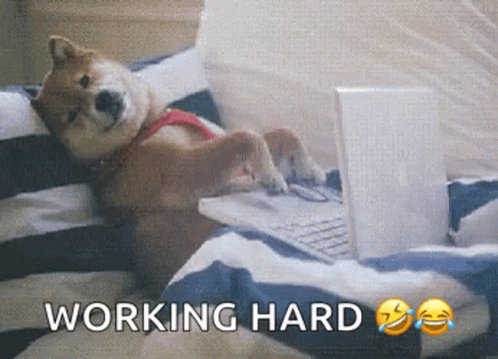

In [ ]:
def searches_data_preprocessing(df, columns_to_clean):
    '''
    '''
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True, subset=['Date', 'Seg1Date'])
    
    for column in columns_to_clean:
        df[column] = df[column].str.strip()
        
        if 'Date' not in column:
            df[column] = df[column].str.upper()
            
            # Para saber si hay lengths superiores a 3 sin que nos de error por los missing values
            cell_lengths = df[column].map(lambda x: len(x) if not isinstance(x, float) else x)
            cell_lengths_notna = cell_lengths[cell_lengths.notna()]
            cell_lengths_sum = (cell_lengths_notna != 3.0).sum()
            
            if cell_lengths_sum != 0:
                print(f'Alert! There are `{column}` values with length different than 3. Dropping them..')
                mask = cell_lengths_notna != 3.0
                wrong_data = cell_lengths_notna[mask]
                print(wrong_data)
                df.drop(index=wrong_data.index, inplace=True)
    return df

In [ ]:
searches_no_dups = pd.read_csv(path_searches_no_dup,
                               sep='^')
searches_no_dups.head()

In [ ]:
searches_no_dups.columns.to_list()

**BONUS**

Trying to use `Dask` for read and process the data even faster than pandas